<a href="https://colab.research.google.com/github/zulylapa/GEOS_518_LAPA/blob/main/mod02_CarbonModel1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 02: A Box Model of Land-Atmosphere Carbon Balance Assignment

## By: Zuly Lapa
## Date: September 11, 2024


### Task #1: Import a csv file


In [2]:
import pandas as pd  # Pandas is a library for data manipulation and analysis

historical_emissions_file = pd.read_csv('/content/sample_data/AnthropogenicEmissions.1751_2008.csv')  # Reads the csv file
print(historical_emissions_file)  # Prints the csv file

     Year  Anthropogenic emissions (GtC)
0    1751                          0.003
1    1752                          0.003
2    1753                          0.003
3    1754                          0.003
4    1755                          0.003
..    ...                            ...
253  2004                          7.782
254  2005                          8.086
255  2006                          8.350
256  2007                          8.543
257  2008                          8.749

[258 rows x 2 columns]


In [28]:
# The following lines of code brings in numpy (as np) which is a python toolbox.
# Inside the toolbox, we are also calling out the plotting tools.

import numpy as np
import matplotlib.pyplot as plt

# Use pandas to read the csv file into a DataFrame
# import pandas as pd
# historical_emissions_file = pd.read_csv('/content/sample_data/AnthropogenicEmissions.1751_2008.csv')

# Convert the DataFrame to a numpy array (numbers float)
data = historical_emissions_file.to_numpy()
# Converts data to integers: data_int = historical_emissions_file.to_numpy(dtype=int)

# Print data
# print(data)
# print(data_int)

Task #2:
Problem A: Modify and rerun the model

In [4]:
# Initial Conditions

M1i = 1100.0  # Mass of carbon in the atmosphere
M2i = 300.0   # Mass of carbon in the land

k12 = 0.0003  # Turnover time of land to atmosphere
k21 = 0.1     # Turnover time of atmoshpere to land

ti = 0.0      # Initial time
tf = 100      # Final time
dt = 1/365    # Step size

t = np.arange(ti,tf+dt,dt)            # Creates an array of time with evenly spaced values. Starts at ti, ends at tf+dt and steps by 1
Nt = t.size                           # Nt is the number of time steps
print('t has '+str(Nt)+' time steps') # Prints the number of time steps

# Create an array of zeros, based off the Nt size for mass of carbon in the atmosphere and land.
M1 = np.zeros((Nt,))   # Creates an array of zeros at Nt size for the mass of carbon in the atmosphere
M2 = np.zeros((Nt,))   # Creates an array of zeros at Nt size for the mass of carbon in the land

year = data[:,0]
cflux = data[:,1]
cflux_t = np.interp(t, year, cflux)
      # Read this documentation to understand what this command does:
      #    https://numpy.org/doc/stable/reference/generated/numpy.interp.html



t has 36501 time steps


In [5]:
# Initializes a for loop, where the array of time is filled up by values.
for i in np.arange(Nt):   # For the array of time steps (which is 21), fill in each value based off the following equation
    if (i==0):            # Sets the initial time step as 0

        M1[i] = M1i       # Mass of carbon in the atmosphere at time step 0 is equal to ....
        M2[i] = M2i       # Mass of carbon in the land at time step 0 is equal to ....

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]
        dM2dt = k12*M1[i-1] - k21*M2[i-1]

        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt

dM1 = np.diff(M1)
dM2 = np.diff(M2)


In [6]:
# Used differential equations to solve an analytical equation.
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) # Analytical equation for mass of carbon in the atmosphere
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) # Analytical equation for mass of carbon in the land

print(M1_anlt)
print(M2_anlt)

[1100.         1100.0812765  1100.16253068 ... 1395.79952219 1395.79952577
 1395.79952936]
[300.         299.9187235  299.83746932 ...   4.20047781   4.20047423
   4.20047064]


In [7]:
# Print M1 and M2

# Side quest to get the array to transpose
  # Reshapes M1 and M2 array to be one column and many rows
  # reshaped_array_M1 = M1.reshape (-1,1)
  # reshaped_array_M2 = M2.reshape (-1,1)

  # Prints M1 and M2 array in one column and many rows
  # print(reshaped_array_M1)
  # print(reshaped_array_M2)

# Print M1 and M2 with no reshaping
# Also note, that M1 and M2 values are similar to the analytical equation
# M1_anlt and M2_anlt
print(M1)
print(M2)

[1100.         1100.08128767 1100.16255301 ... 1395.79954015 1395.79954373
 1395.79954731]
[300.         299.91871233 299.83744699 ...   4.20045985   4.20045627
   4.20045269]


Problem B: Examine impacts of human emissions

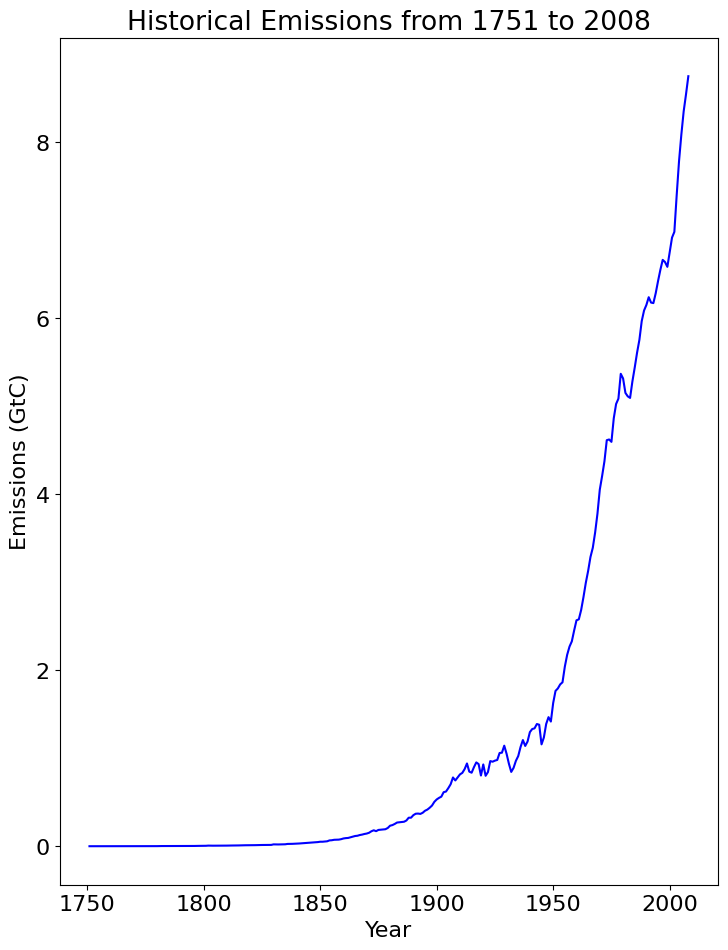

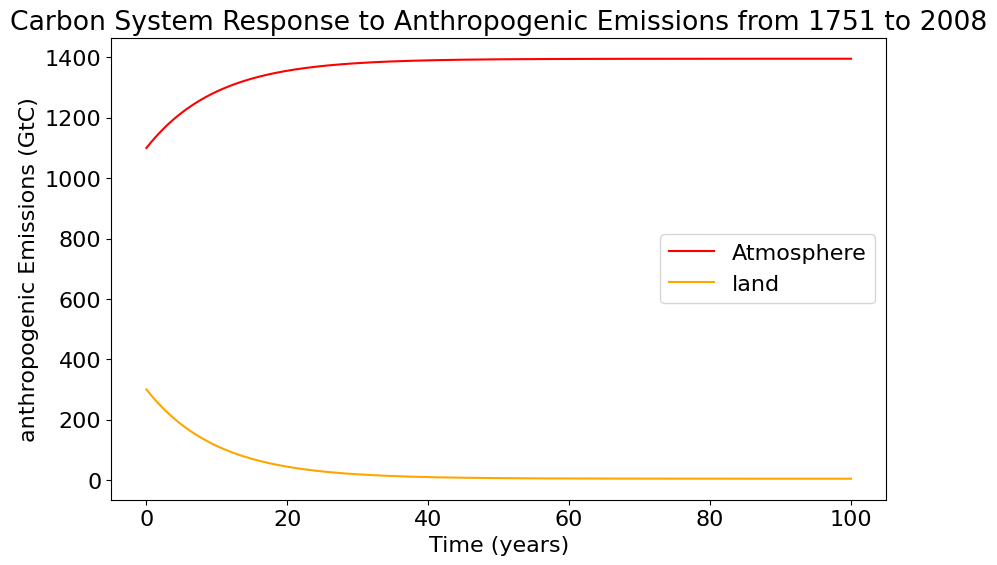

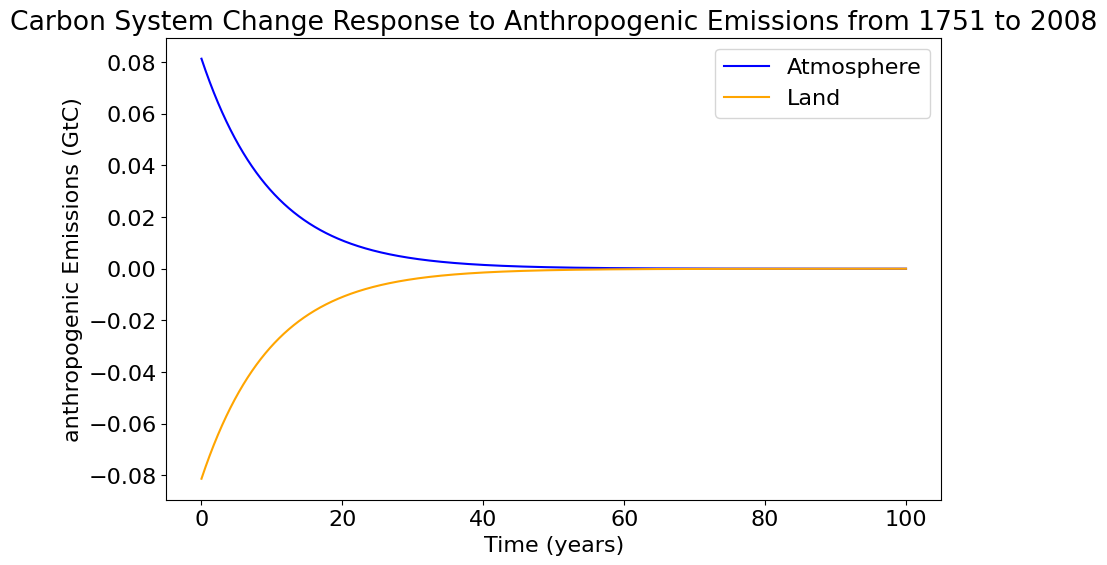

In [29]:
# Plot the historical emissions data
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.plot(year, cflux, color='blue')
plt.xlabel('Year')
plt.ylabel('Emissions (GtC)')
plt.title('Historical Emissions from 1751 to 2008')
plt.show()

# Plot M1 and M2 verus time
plt.figure(figsize=(10, 6))
plt.plot(t, M1, label='Atmosphere', color='red')
plt.plot(t, M2, label='land', color='orange')
plt.xlabel('Time (years)')
plt.ylabel('anthropogenic Emissions (GtC)')
plt.title('Carbon System Response to Anthropogenic Emissions from 1751 to 2008')
plt.legend()
plt.show()

# Sidequest to compare the analytical solution of the carbon model and differential solution

  # Plot M1 and M1_anlt versus time
  # plt.figure(figsize=(10, 6))
  # plt.plot(t, M1, label='Atmosphere', color='red')
  # plt.plot(t, M1_anlt, label='Atmosphere Analytical', linestyle='--', color='black')
  # plt.xlabel('Time (years)')
  # plt.ylabel('anthropogenic Emissions (GtC)')
  # plt.title('Carbon System Response to Anthropogenic Emissions from 1751 to 2008')
  # plt.legend()
  # plt.show()

  # Plot M2 and M2_anlt versus time
  # plt.figure(figsize=(10, 6))
  # plt.plot(t, M2, label='Land', color='orange')
  # plt.plot(t, M2_anlt, label='Land Analytical', linestyle='--', color='black')
  # plt.xlabel('Time (years)')
  # plt.ylabel('anthropogenic Emissions (GtC)')
  # plt.title('Carbon System Response to Anthropogenic Emissions from 1751 to 2008')
  # plt.legend()
  # plt.show()

# Plot change in M1 and M2 (diff code) verus time
plt.figure(figsize=(10, 6))
plt.plot(t[:-1], dM1, label='Atmosphere', color='blue')# Need to remove the last value at t to make dM1 and t the same size
plt.plot(t[:-1], dM2, label='Land', color='orange')# Need to remove the last value at t to make dM1 and t the same size
plt.xlabel('Time (years)')
plt.ylabel('anthropogenic Emissions (GtC)')
plt.title('Carbon System Change Response to Anthropogenic Emissions from 1751 to 2008')
plt.legend()
plt.show()


In [16]:
# Print M1 and M2 at the end of the simulation, which is 2008.
# Side quest to figure out how to reduce the numbers past the
# decimal to two values.
print(f"M1 at the end of the simulation in 2008: {M1[-1]:.2f}")
print(f"M2 at the end of the simulation in 2008: {M2[-1]:.2f}")

M1 at the end of the simulation in 2008: 1395.80
M2 at the end of the simulation in 2008: 4.20


Problem C: Examine the effects of mitigation

In [23]:
alternative_emissions_file = pd.read_csv('/content/sample_data/EmissionsMitigationScenarios.2008_2100.csv')  # Reads the csv file
# print(alternative_emissions_file)  # Prints the csv file

# Convert the DataFrame to a numpy array (numbers float)
data_update = alternative_emissions_file.to_numpy()

# Print data
# print(data_update)

In [76]:
# Initial Conditions for Net Zero Emissions by 2030
M1i_nz30 = 1395.80   # Mass of carbon in the atmosphere
M2i_nz30 = 4.20   # Mass of carbon in the biosphere

k12_nz30 = 0.0003  # Turnover time of biosphere to biosphere
k21_nz30 = 0.1     # Turnover time of atmoshpere to atmosphere

ti_nz30 = 0.0      # Initial time
tf_nz30 = 100      # Final time
dt_nz30 = 1/365    # Step size

t_nz30 = np.arange(ti_nz30,tf_nz30+dt_nz30,dt_nz30)            # Creates an array of time with evenly spaced values. Starts at ti, ends at tf+dt and steps by 1
Nt_nz30 = t_nz30.size                           # Nt is the number of time steps
# print('t has '+str(Nt_z)+' time steps') # Prints the number of time steps

# Create an array of zeros, based off the Nt size for mass of carbon in the atmosphere and biosphere.
M1_nz30 = np.zeros((Nt_nz30,))   # Creates an array of zeros at Nt size for the mass of carbon in the atmosphere
M2_nz30 = np.zeros((Nt_nz30,))   # Creates an array of zeros at Nt size for the mass of carbon in the biosphere

year_nz30 = data_update[:,0]
cflux_nz30 = data_update[:,1]
cflux_t_nz30 = np.interp(t_nz30, year_nz30, cflux_nz30)
# print(cflux_nz30)

# Initializes a for loop, where the array of time is filled up by values.
for i in np.arange(Nt_nz30):   # For the array of time steps (which is 21), fill in each value based off the following equation
    if (i==0):            # Sets the initial time step as 0

        M1_nz30[i] = M1i_nz30       # Mass of carbon in the atmosphere at time step 0 is equal to ....
        M2_nz30[i] = M2i_nz30       # Mass of carbon in the biosphere at time step 0 is equal to ....

    else:
        dM1dt_nz30 = k21*M2_nz30[i-1] - k12*M1_nz30[i-1]
        dM2dt_nz30 = k12*M1_nz30[i-1] - k21*M2_nz30[i-1]

        M1_nz30[i] = M1_nz30[i-1] + dM1dt_nz30*dt_nz30
        M2_nz30[i] = M2_nz30[i-1] + dM2dt_nz30*dt_nz30

dM1_nz30 = np.diff(M1_nz30)
dM2_nz30 = np.diff(M2_nz30)



In [77]:
# Initial Conditions for Net Zero Emissions by 2050
M1i_nz50 = 1395.80   # Mass of carbon in the atmosphere
M2i_nz50 = 4.2   # Mass of carbon in the biosphere

k12_nz50 = 0.0003  # Turnover time of biosphere to biosphere
k21_nz50 = 0.1     # Turnover time of atmoshpere to atmosphere

ti_nz50 = 0.0      # Initial time
tf_nz50 = 100      # Final time
dt_nz50 = 1/365    # Step size

t_nz50 = np.arange(ti_nz50,tf_nz50+dt_nz50,dt_nz50)            # Creates an array of time with evenly spaced values. Starts at ti, ends at tf+dt and steps by 1
Nt_nz50 = t_nz50.size                           # Nt is the number of time steps
# print('t has '+str(Nt_z)+' time steps') # Prints the number of time steps

# Create an array of zeros, based off the Nt size for mass of carbon in the atmosphere and biosphere.
M1_nz50 = np.zeros((Nt_nz50,))   # Creates an array of zeros at Nt size for the mass of carbon in the atmosphere
M2_nz50 = np.zeros((Nt_nz50,))   # Creates an array of zeros at Nt size for the mass of carbon in the biosphere

year_nz50 = data_update[:,0]
cflux_nz50 = data_update[:,2]
cflux_t_nz50 = np.interp(t_nz50, year_nz50, cflux_nz50)
# print(cflux_nz50)

# Initializes a for loop, where the array of time is filled up by values.
for i in np.arange(Nt_nz50):   # For the array of time steps (which is 21), fill in each value based off the following equation
    if (i==0):            # Sets the initial time step as 0

        M1_nz50[i] = M1i_nz50       # Mass of carbon in the atmosphere at time step 0 is equal to ....
        M2_nz50[i] = M2i_nz50       # Mass of carbon in the biosphere at time step 0 is equal to ....

    else:
        dM1dt_nz50 = k21*M2_nz50[i-1] - k12*M1_nz50[i-1]
        dM2dt_nz50 = k12*M1_nz50[i-1] - k21*M2_nz50[i-1]

        M1_nz50[i] = M1_nz50[i-1] + dM1dt_nz50*dt_nz50
        M2_nz50[i] = M2_nz50[i-1] + dM2dt_nz50*dt_nz50

dM1_nz50 = np.diff(M1_nz50)
dM2_nz50 = np.diff(M2_nz50)

In [89]:
# Initial Conditions for Zero Emission Growth starting in 2008
M1i_nz = 1395.80   # Mass of carbon in the atmosphere
M2i_nz = 4.20   # Mass of carbon in the biosphere

k12_nz = 0.0003  # Turnover time of biosphere to biosphere
k21_nz = 0.1     # Turnover time of atmoshpere to atmosphere

ti_nz = 0.0      # Initial time
tf_nz = 100      # Final time
dt_nz = 1/365    # Step size

t_nz = np.arange(ti_nz,tf_nz+dt_nz,dt_nz)            # Creates an array of time with evenly spaced values. Starts at ti, ends at tf+dt and steps by 1
Nt_nz = t_nz.size                           # Nt is the number of time steps
# print('t has '+str(Nt_z)+' time steps') # Prints the number of time steps

# Create an array of zeros, based off the Nt size for mass of carbon in the atmosphere and biosphere.
M1_nz = np.zeros((Nt_nz,))   # Creates an array of zeros at Nt size for the mass of carbon in the atmosphere
M2_nz = np.zeros((Nt_nz,))   # Creates an array of zeros at Nt size for the mass of carbon in the biosphere

year_nz = data_update[:,0]
cflux_nz = data_update[:,3]
cflux_t_nz = np.interp(t_nz, year_nz, cflux_nz)
# print(cflux_nz)

# Initializes a for loop, where the array of time is filled up by values.
for i in np.arange(Nt_nz):   # For the array of time steps (which is 21), fill in each value based off the following equation
    if (i==0):            # Sets the initial time step as 0

        M1_nz[i] = M1i_nz       # Mass of carbon in the atmosphere at time step 0 is equal to ....
        M2_nz[i] = M2i_nz       # Mass of carbon in the biosphere at time step 0 is equal to ....

    else:
        dM1dt_nz = k21*M2_nz[i-1] - k12*M1_nz[i-1]
        dM2dt_nz = k12*M1_nz[i-1] - k21*M2_nz[i-1]

        M1_nz[i] = M1_nz[i-1] + dM1dt_nz*dt_nz
        M2_nz[i] = M2_nz[i-1] + dM2dt_nz*dt_nz

dM1_nz = np.diff(M1_nz)
dM2_nz = np.diff(M2_nz)



[1395.8        1395.80000345 1395.8000069  ... 1395.81256176 1395.81256176
 1395.81256176]
[1395.8        1395.80000345 1395.8000069  ... 1395.81256176 1395.81256176
 1395.81256176]
[1395.79954731 1395.82352075 1395.84749417 ...    0.            0.
    0.        ]


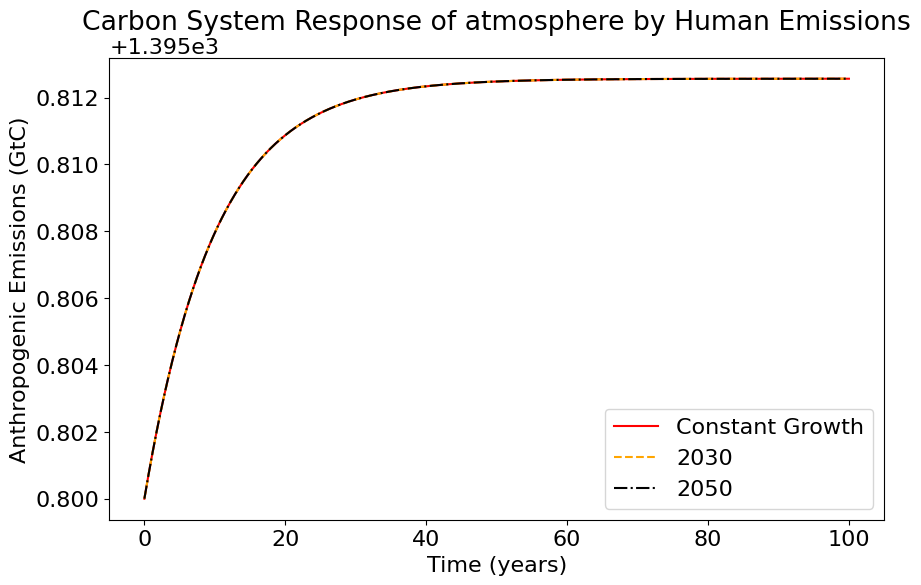

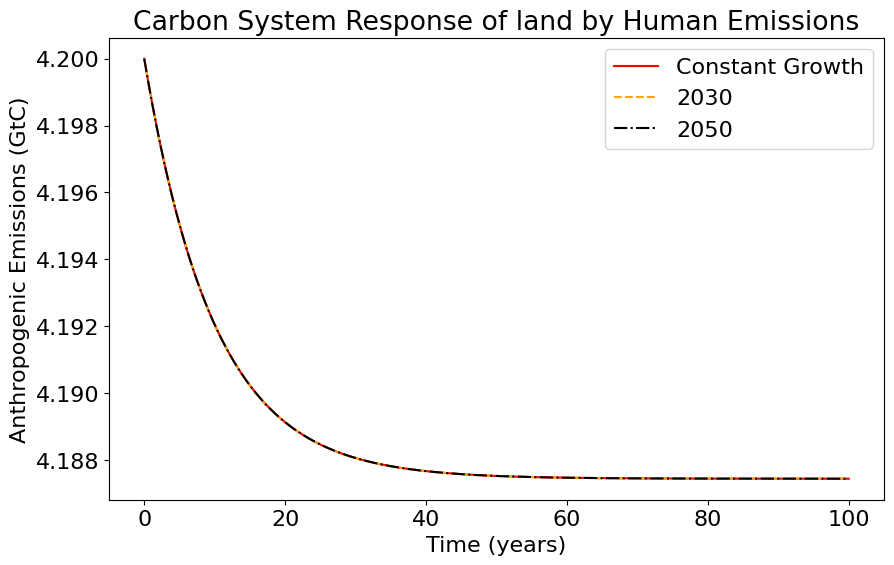

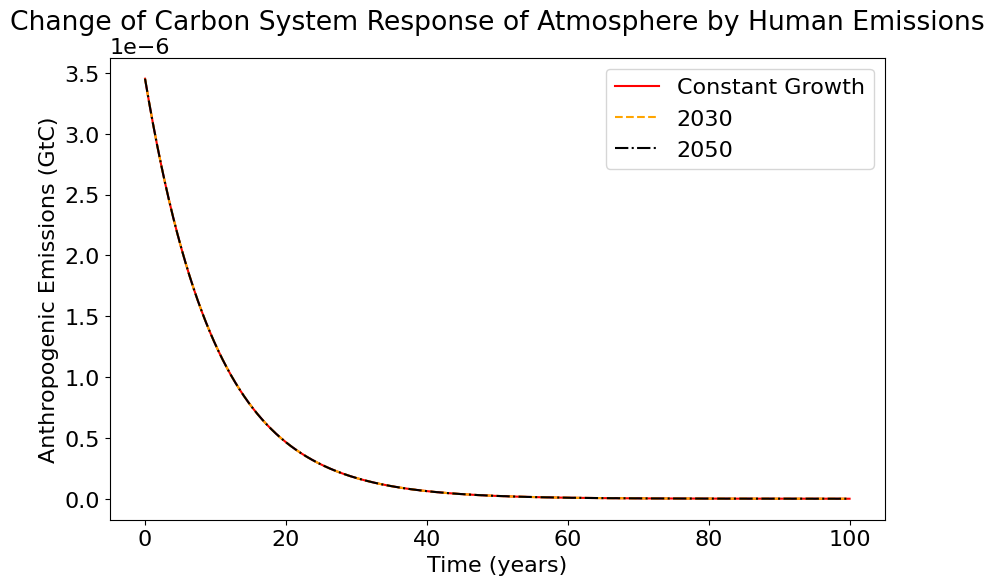

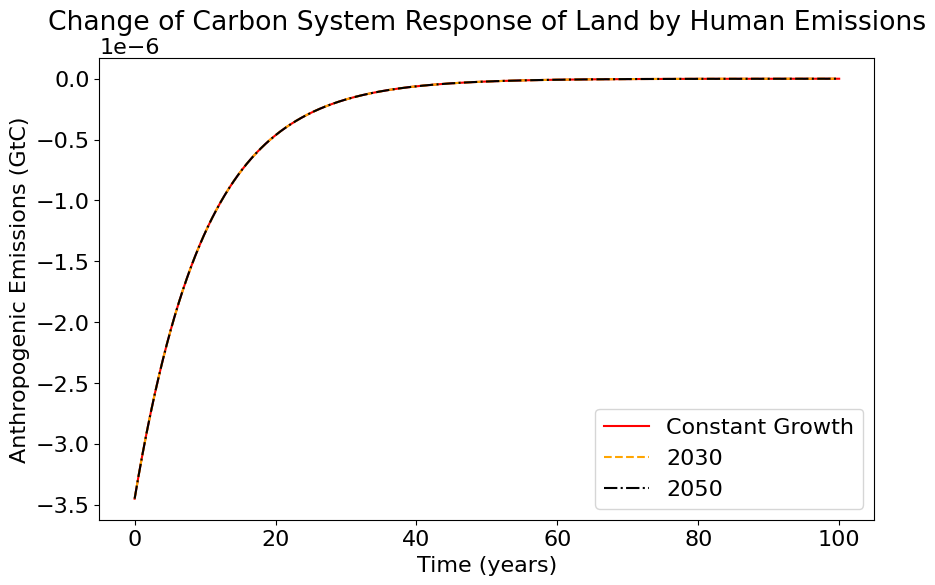

In [99]:
# Plot 3 types of human emissions to the atmosphere
plt.figure(figsize=(10, 6))
plt.plot(t_nz30, M1_nz, label='Constant Growth', color='red')
plt.plot(t_nz30, M1_nz30, label='2030', color='orange', linestyle='--')
plt.plot(t_nz30, M1_nz50, label='2050', color='black', linestyle='-.')

#linestyle='--'
print(M1_nz50)
print(M1_nz30)
print(M1_constant)


plt.xlabel('Time (years)')
plt.ylabel('Anthropogenic Emissions (GtC)')
plt.title('Carbon System Response of atmosphere by Human Emissions')
plt.legend()
plt.show()

# Plot 3 types of human emissions to the land
plt.figure(figsize=(10, 6))
plt.plot(t_nz30, M2_nz, label='Constant Growth', color='red')
plt.plot(t_nz30, M2_nz30, label='2030', color='orange', linestyle='--')
plt.plot(t_nz30, M2_nz50, label='2050', color='black', linestyle='-.')

plt.xlabel('Time (years)')
plt.ylabel('Anthropogenic Emissions (GtC)')
plt.title('Carbon System Response of land by Human Emissions')
plt.legend()
plt.show()

# Plot 3 types of change of carbon mass in the atmosphere versus time
plt.figure(figsize=(10, 6))
plt.plot(t_nz30[:-1], dM1_nz, label='Constant Growth', color='red')
plt.plot(t_nz30[:-1], dM1_nz30, label='2030', color='orange', linestyle='--')
plt.plot(t_nz30[:-1], dM1_nz50, label='2050', color='black', linestyle='-.')

plt.xlabel('Time (years)')
plt.ylabel('Anthropogenic Emissions (GtC)')
plt.title('Change of Carbon System Response of Atmosphere by Human Emissions')
plt.legend()
plt.show()

# Plot 3 types of change of carbon mass in the land versus time
plt.figure(figsize=(10, 6))
plt.plot(t_nz30[:-1], dM2_nz, label='Constant Growth', color='red')
plt.plot(t_nz30[:-1], dM2_nz30, label='2030', color='orange', linestyle='--')
plt.plot(t_nz30[:-1], dM2_nz50, label='2050', color='black', linestyle='-.')

plt.xlabel('Time (years)')
plt.ylabel('Anthropogenic Emissions (GtC)')
plt.title('Change of Carbon System Response of Land by Human Emissions')
plt.legend()
plt.show()